# Section 4: Hands-On Data Analysis Lab

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let’s think of some questions or insights we would like to obtain from the data. So here’s a list of questions we’ll try to answer using our data analysis skills!

###  First some basic questions:

- 1.) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
- 2.) What deck were the passengers on and how does that relate to their class?
- 3.) Where did the passengers come from?
- 4.) Who was alone and who was with family?

### Then we’ll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?


The first step is to get the data and load it to memory. You can download data from this link: 
[Titanic — Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data?select=train.csv). 

We are going to use Pandas for data manipulation. 

**Matplotlib** and **Seaborn** for Data Visualization. A quick way to check your data is by using **.head()** method.

In [ ]:
# Read the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
plt.style.use("fivethirtyeight")
titanic_df = pd.read_csv('../../../datasets/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understanding Your Data with Pandas

After successfully reading the data, it's important to check and explore it effectively. Pandas provides a variety of functions that allow us to discover our data quickly and thoroughly. The goal here is to gain insight into the dataset and become a subject matter expert on it.

## Key Questions to Address

When exploring data, consider the following important questions:

1. **What kind of data do we have and how do we treat different types?**
   - Identify the data types of each feature (e.g., numeric, categorical, datetime).
   - Understand how to handle each type:
     - **Numeric Data:** Often requires scaling or normalization.
     - **Categorical Data:** May need encoding (e.g., one-hot encoding).
     - **Datetime Data:** Can involve extraction of specific components (year, month, day).

2. **What’s missing from the data and how do you deal with it?**
   - Check for missing values in the dataset.
   - Determine the extent and location of missing data.
   - Decide on a strategy to handle missing values:
     - **Deletion:** Remove rows or columns with missing values (if not substantial).
     - **Imputation:** Fill missing values with means, medians, or modes, or use predictive algorithms.

3. **How can you add, change, or remove features to get more out of your data?**
   - **Feature Engineering:** Create new features that could enhance model performance (e.g., combining existing features, extracting date components).
   - **Feature Selection:** Identify and retain the most relevant features while eliminating those that may introduce noise.
   - **Feature Transformation:** Apply transformations to features (e.g., log transformations for skewed data or polynomial features for non-linear relationships).


# Variable Notes for Titanic Dataset

| Variable    | Description                                                      |
|-------------|------------------------------------------------------------------|
| PassengerId | Unique ID of the passenger                                       |
| Survived    | Survived (1) or died (0)                                       |
| Pclass      | Passenger’s class (1st, 2nd, or 3rd)                           |
| Name        | Passenger’s name                                                |
| Sex         | Passenger’s sex                                                 |
| Age         | Passenger’s age                                                |
| SibSp      | Number of siblings/spouses aboard the Titanic                   |
| Parch       | Number of parents/children aboard the Titanic                   |
| Ticket      | Ticket number                                                   |
| Fare        | Fare paid for ticket                                            |
| Cabin       | Cabin number                                                    |
| Embarked    | Where the passenger got on the ship (C — Cherbourg, S — Southampton, Q — Queenstown) |


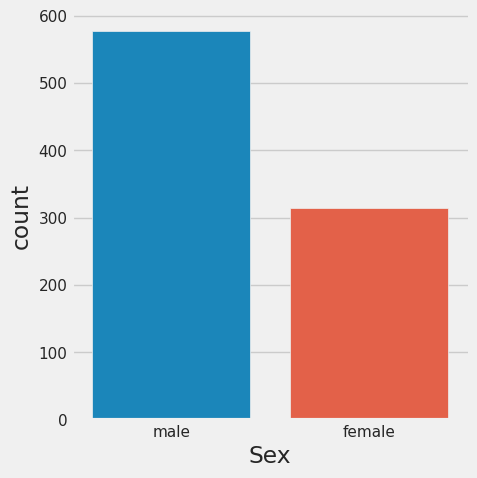

In [15]:
# 1. Who were the passengers on the Titanic?
# Let's first check gender
# 'countplot': Figure-level interface for drawing categorical plots onto a FacetGrid.
import seaborn as sns
sns.catplot(x='Sex', data=titanic_df,  hue='Sex', kind='count')

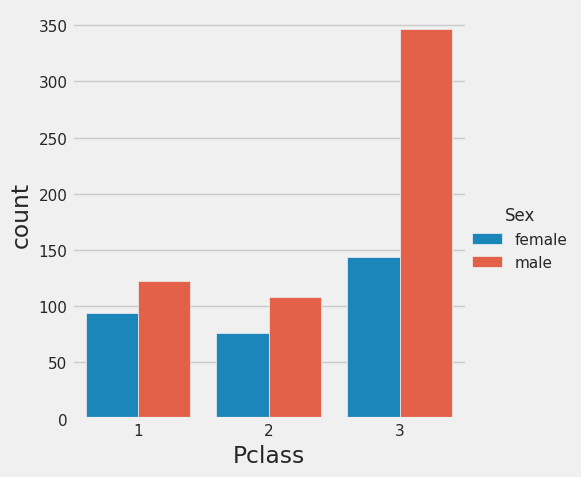

In [11]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')

# Analyzing Gender and Age Distribution in the Titanic Dataset

Upon initial exploration of the Titanic dataset, an intriguing observation emerges: there is a significantly higher number of males in the 3rd class compared to females. 

This finding prompts further investigation into the demographic split within the passenger population. 

In particular, understanding the distribution among males, females, and children could yield valuable insights into survival patterns and social dynamics on board the Titanic.


In [16]:
# Create a new column 'Person' in which every person under 16 is child.
titanic_df['Person'] = titanic_df.Sex
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'
# Checking the distribution
print(f"Person categories : {titanic_df.Person.unique()}\n=================================")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=================================")
print(f"Mean age : {titanic_df.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


Excellent! 

Now we have separated the passengers between female, male, and child. This will be important later on because of the famous 

**“Women and children first policy”!**

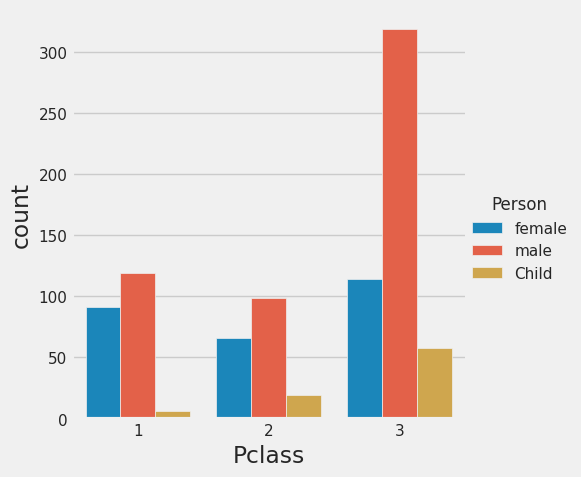

In [17]:
sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')

# Analyzing Age Distribution Among Titanic Passengers

**An interesting observation arises when examining the Titanic dataset:**

there is a notable presence of **children in 3rd class**, while the number of **children in 1st class is considerably lower**. This variation prompts us to delve deeper into the age distribution of all passengers. 

To obtain a more precise understanding of the demographics of those onboard, **we should create a detailed distribution of ages**. 

By visualizing age data, we can better comprehend the characteristics of the passenger population and analyze **how age may have influenced survival rates** and social dynamics during the Titanic's voyage.


<Axes: >

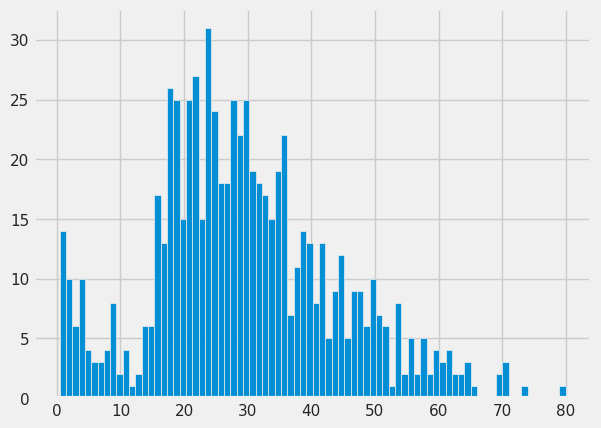

In [22]:
# visualizing age distribution
titanic_df.Age.hist(bins=80)

# Analysis of Titanic's Demographics by Age

The age histogram of the Titanic's passengers reveals a very specific demographic, with the passenger count on the vertical axis (Y) and age on the horizontal axis (X).

-   **Peak of Young Adults:** The overwhelming majority of passengers were between **20 and 35 years old**. This fact suggests a travel profile dominated by workers, immigrants, and young people seeking new opportunities in America.

-   **Notable Family Presence:** A second significant peak between **0 and 5 years old** demonstrates the strong presence of families with small children, indicating that it was not just single adults making the crossing.

-   **Less Common Groups:** There is a visible dip in the adolescent range (approximately 10-16 years) and a sharp decline after the age of 40. Elderly passengers were a minority, appearing as outliers on the chart.

-   **Skewed Distribution:** Technically, the chart has a **right-skewed distribution** (positive skew). This confirms that while the passenger base was young, the "tail" of the distribution extends toward the older, much less frequent ages.

## Conclusion

- The age composition on the Titanic was far from uniform. 
- It was primarily shaped by a young workforce and budding families. 
- This profile directly reflects the migration patterns of the early 20th century, where the search for a new life outweighed the challenges of a long and expensive transatlantic journey.

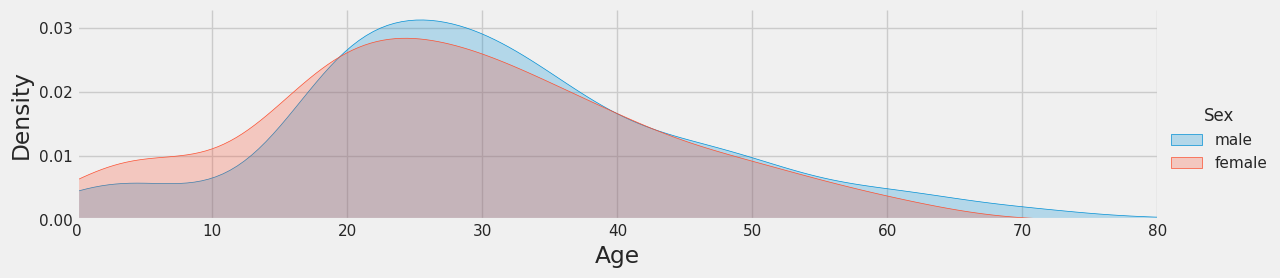

In [ ]:
# titanic_df = sns.load_dataset('titanic')
titanic_df.dropna(subset=['Age'], inplace=True) # Drop rows without an age for the plot to work

# Another way to visualize the data is to use FacetGrid to plot multiple kdeplots
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

plt.show() # Added to display the plot

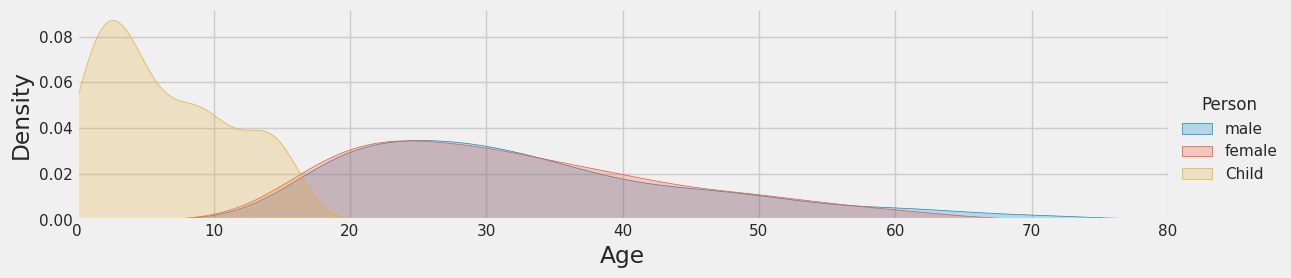

In [26]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

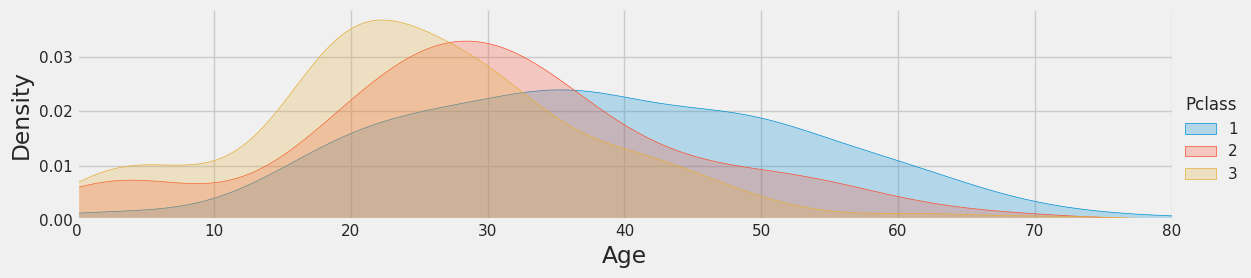

In [28]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

# Analyzing Passenger Deck Location in Relation to Class

Having established a comprehensive understanding of the passenger demographics based on sex, age, and class, we can now shift our focus to a related aspect of our analysis: the deck on which the passengers were located. 

Specifically, we aim to explore how the deck assignments correlate with the class of the passengers. Understanding the distribution of passengers across different decks may provide insights into the layout of the Titanic, as well as the accessibility and conditions experienced by passengers of varying social standings.

In order to investigate this relationship, we will analyze the data to determine deck assignments for each passenger and examine how these assignments correspond to their respective classes. This analysis will enhance our understanding of the spatial dynamics on board the Titanic and contribute to a more nuanced interpretation of the factors influencing survival during the tragic event.


## 2. What deck were the passengers on and how does that relate to their class?

In [29]:
# visualizing the dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


### So we can see that the Cabin column has information on the deck, but it has several NaN values, so we’ll have to drop them.

In [30]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 185, dtype: object

### Notice we only need the first letter of the deck to classify its level (e.g. A, B, C, D, E, F, G)

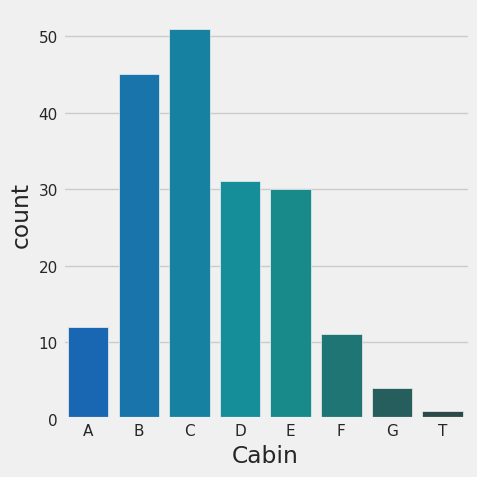

In [36]:
# let's grab that letter for the deck level with a simple for loop
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot(x='Cabin', data=cabin_df, kind='count', hue='Cabin', palette='winter_d')


### Interesting to note we have a ‘T’ deck value there which doesn’t make sense, we can drop it out with the following code:

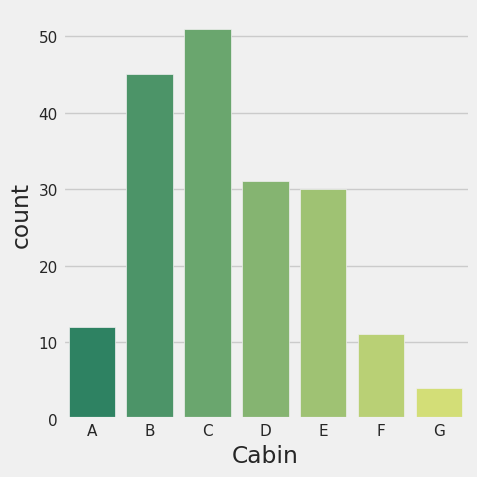

In [37]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', data=cabin_df, kind='count', hue='Cabin' ,palette='summer')

## 3. Where did the passengers come from?

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


## Note here that the Embarked column has C, Q, and S values. 

### Reading about the project on Kaggle you’ll note that these stand for Cherbourg, Queenstown, and Southhampton.

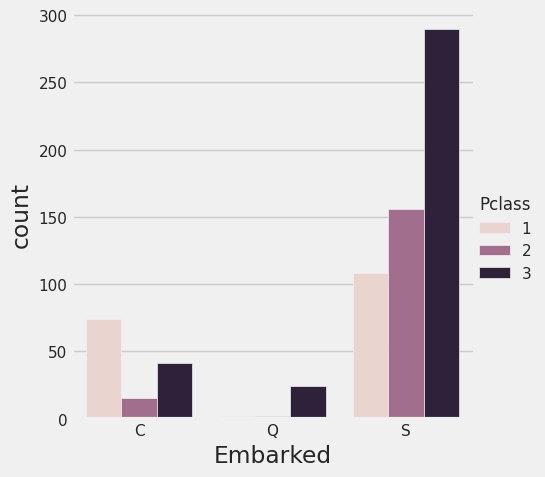

In [40]:
# Now we can make a quick factorplot to check out the results, note the 
# order argument, used to deal with NaN values
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded **there were 3rd class.** 

It would be interesting to **look at the economics of that town** in that time period for further investigation.

## 4. Who was alone and who was with family?

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [53]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone

0      1
1      1
2      0
3      1
4      0
      ..
885    5
886    0
887    0
889    0
890    0
Name: Alone, Length: 714, dtype: int64

# Transforming the "Alone" Column in the Titanic Dataset

With our current understanding of the "Alone" column in the Titanic dataset, we can glean valuable insights regarding the familial presence of passengers. Specifically, if the value in the "Alone" column is anything other than zero, it indicates that the passenger had family members aboard the Titanic and was therefore not alone.

To enhance our analysis and improve the interpretability of this data, we propose a **transformation of the "Alone"** column. We will convert the existing values such that passengers with a value greater than zero will be marked as being accompanied by family, while those with a value of zero will be classified as having traveled alone.

This transformation will allow for clearer segmentation of the passenger data, enabling a more refined analysis of the impact of family presence on survival outcomes and social dynamics during the voyage. 

By categorizing passengers in this manner, we can better understand the relationships and support networks that may have existed among passengers during this historical event.


In [54]:
# Look for > 0 or == 0 to set alone status
alone_status = np.where(titanic_df['Alone'] > 0, 'With Family', 'Alone')
# Assigns the new series back to the original column. This replaces the entire column.
titanic_df['Alone'] = alone_status
# Let's check to make sure it worked
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


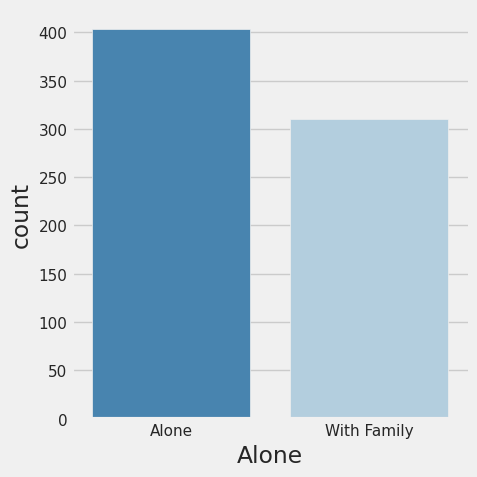

In [57]:
# Now let's get a simple visualization!
sns.catplot(x='Alone', data=titanic_df, kind='count', hue='Alone', palette='Blues', 
            order=['Alone', 'With Family'])

# Investigating Factors Influencing Survival in the Titanic Disaster

Having conducted a comprehensive analysis of the Titanic dataset, we now arrive at a critical and thought-provoking question: What factors contributed to an individual's likelihood of surviving the sinking?

This inquiry is not only intriguing but also complex, encompassing a range of variables including passenger demographics, social class, familial connections, and other contextual elements. To address this question, we will perform a detailed examination of the dataset, employing statistical techniques and machine learning models to identify significant predictors of survival.

By analyzing the interplay between various factors—such as age, sex, class, and family presence—we aim to uncover insights that reveal the dynamics of survival during this historic tragedy. Understanding these factors will not only enhance our comprehension of the events during the sinking but also provide valuable lessons regarding human behavior in crisis situations.


# 5. What factors helped someone survive the sinking?

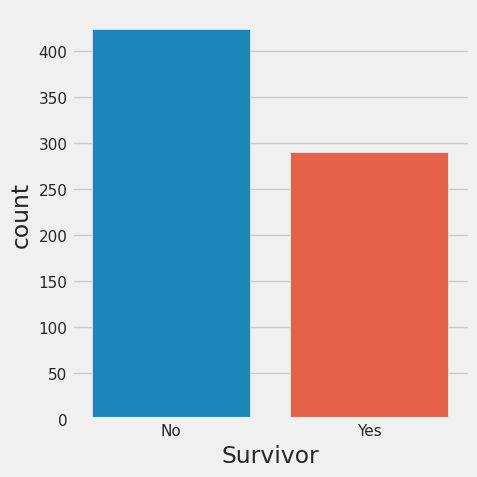

In [58]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})
# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor', data=titanic_df, hue='Survivor', kind='count')

# Analyzing the Impact of Class on Survival Rates in the Titanic Disaster

Our analysis reveals a stark reality: a significantly higher number of passengers perished in the sinking of the Titanic compared to those who survived. This prompts us to investigate whether the class of passengers played a role in their survival rates. 

The popularization of the Titanic narrative through film and media has emphasized the notion that 3rd class passengers faced greater challenges in securing survival **compared to their 1st and 2nd class counterparts**. 

To assess the validity of this claim, we will analyze the survival rates across different passenger classes.

By comparing the **survival outcomes of 1st, 2nd, and 3rd class passengers**, we aim to uncover patterns that may elucidate how socio-economic status influenced individuals' chances of surviving the disaster. 

This analysis will provide valuable insights into the human experiences during the Titanic’s tragic voyage, as well as the broader implications of class disparities in crisis situations.


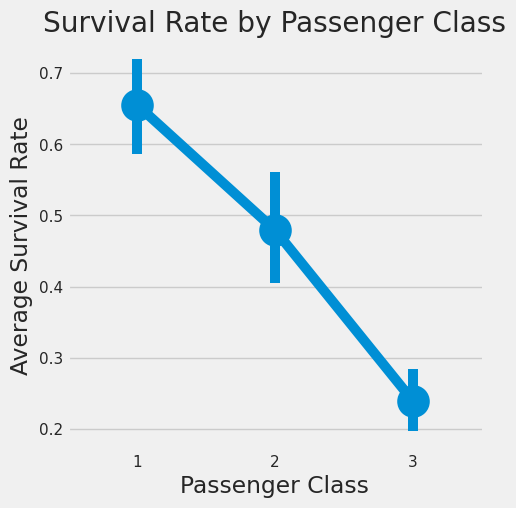

In [60]:
# Let's use a factor plot again, but now considering class
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='point')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Average Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# Examining Survival Rates in 3rd Class Passengers

Our initial findings indicate that survival rates among 3rd class passengers are significantly lower compared to those in 1st and 2nd class. However, it is crucial to consider whether this observation is influenced by the demographic composition of 3rd class, particularly the higher proportion of men in this category. 

The established policy of prioritizing women and children for lifeboat access may have disproportionately impacted the survival chances of male passengers, especially those traveling in 3rd class. To gain a clearer understanding of this interaction, we will employ the 'hue' parameter in our analysis.

By incorporating a gender distinction into our visualizations, we can better assess the interplay between class, sex, and survival rates. This approach will enable us to discern whether the observed survival disparities are primarily driven by the class structure or influenced by gender dynamics under the life-threatening circumstances of the Titanic disaster. Through this refined analysis, we aim to provide a more nuanced interpretation of survival outcomes for the different passenger demographics.


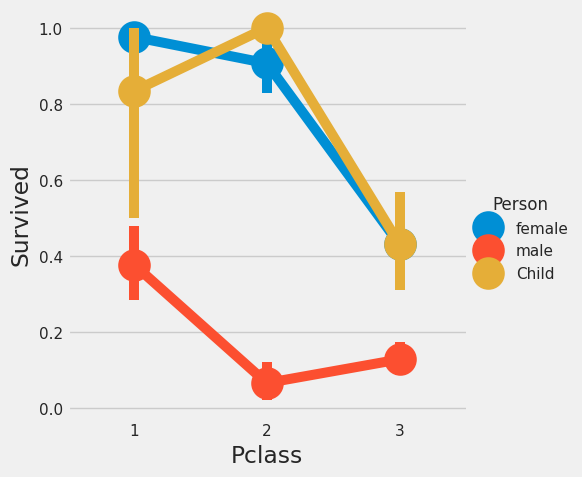

In [61]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='Person', kind='point')

# Evaluating the Impact of Age on Survival Rates

Our investigation reveals that being male or classified in 3rd class significantly diminishes the chances of survival among Titanic passengers. Furthermore, regardless of class, being male appears to substantially lower the likelihood of survival across all demographics.

This leads us to a critical question regarding the role of age: Did age influence the survival rates of passengers on the Titanic? To address this, we will analyze the data to assess whether younger or older individuals experienced differing outcomes in terms of survival.

By examining age distributions among survivors and non-survivors, we aim to identify any noteworthy patterns or correlations that may suggest whether age played a significant role during the disaster. Understanding the impact of age on survival will enhance our knowledge of the factors affecting individuals’ chances of survival in life-threatening situations, contributing to a more comprehensive analysis of the Titanic tragedy.


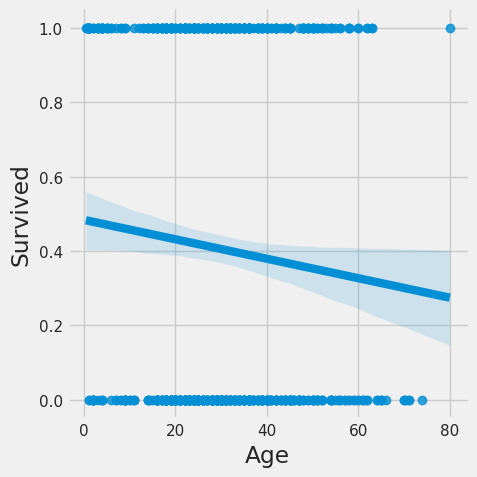

In [62]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age', y='Survived', data=titanic_df)

# Analyzing the Relationship Between Age, Class, and Survival Rates

Our data indicates a general trend: the older a passenger was, the lower their survival rate. To investigate this relationship in more detail, we will use the hue technique in our visualizations. This approach will allow us to see how class and age variables interact and affect survival rates.

By plotting the data with the hue distinction, we will be able to identify more complex patterns and assess whether passenger class modulates the relationship between age and survival. This method will help us elucidate how the combination of social class and age impacted each individual’s chances during the sinking of the Titanic.

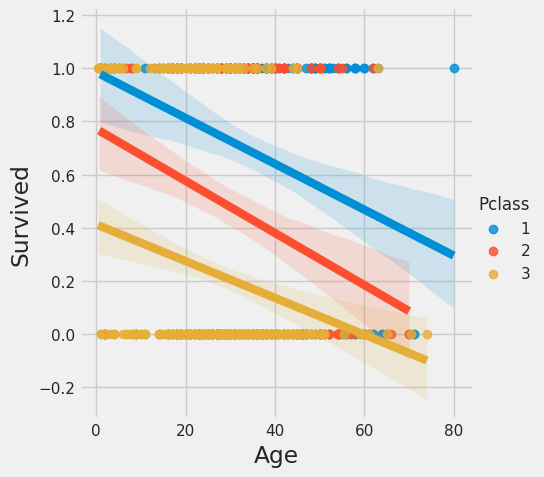

In [63]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age', y='Survived',hue='Pclass', data=titanic_df)

### We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with an std attached!

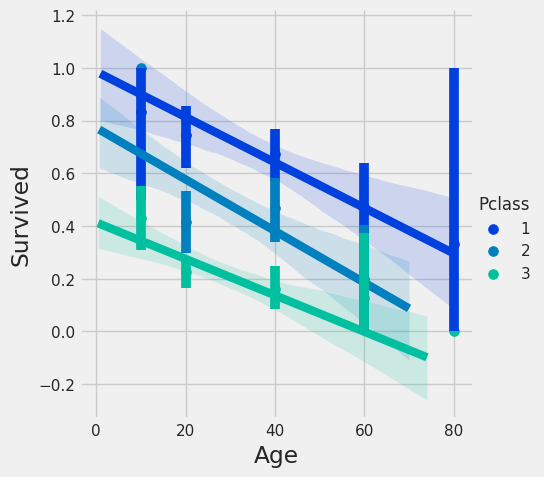

In [64]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

## Interesting find on the older 1st class passengers! What about if we relate to gender and age with the survival set?

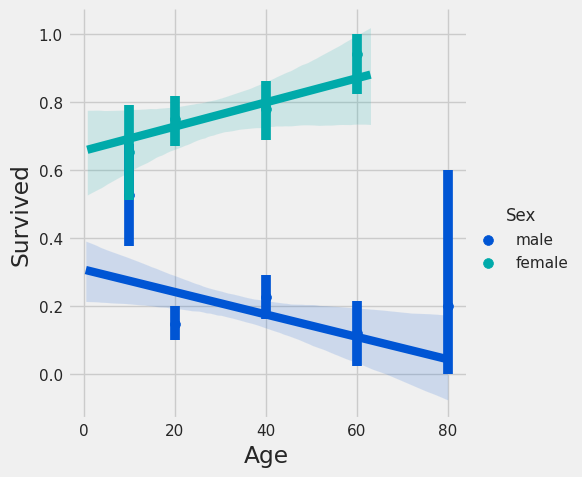

In [65]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

### Awesome! 

we’ve gotten some really great insights on how gender, age, and class all related to a passenger’s chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

- 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
- 2.) Did having a family member increase the odds of surviving the crash?